## Problem Statement

### Business Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

### Imports

In [1]:
# Import necessary libraries

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

from sklearn_pandas import DataFrameMapper

# To get different metric scores
from sklearn.metrics import classification_report
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To suppress and ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [2]:
loan_modelling_data = pd.read_csv("Loan_Modelling.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = loan_modelling_data.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


* The Age, Income, and Experience fields show a wide range of values, indicating the dataset includes a diverse set of customers. For instance, the Experience values range from 1 year to 40 years. 
* The Personal_Loan field is binary (0 or 1), representing whether a customer accepted the loan offer. A majority of rows in both the head and tail have Personal_Loan as 0, suggesting an imbalanced target variable.
* Some customers have unusually high Mortgage values or significantly low CCAvg values (e.g., 0 or 0.3). These might indicate outliers or patterns worth exploring.


### Understand the shape of the dataset.

In [6]:
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns.

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All columns in the dataset are numeric in nature, with one column (CCAvg) being of type float64 and the rest (ID, Age, Experience, Income, ZIPCode, Family, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard) being of type int64.


### Checking for missing values

In [8]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* The dataset has no missing values, as all columns have a count of 0 for null entries.

### Dropping the duplicate values

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

#### Dropping the columns with all unique values

In [10]:
data.ID.nunique()

5000

* The `ID` column contains only unique values, so we can drop it

In [11]:
data = data.drop(["ID"], axis=1)

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


* Age and Experience: The dataset includes a wide age range (23 to 67 years), with a mean of ~45 years. However, the Experience column contains unexpected negative values (minimum of -3), indicating possible data quality issues or errors.
* Income Distribution: Customers have an average annual income of $73.8k, but the large standard deviation ($46k) and a maximum value of $224k suggest significant income disparity across customers.
* Personal Loan Target: Only 9.6% of customers accepted a personal loan, confirming that the target variable (Personal_Loan) is highly imbalanced, which may impact model performance.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Income Distribution Analysis**

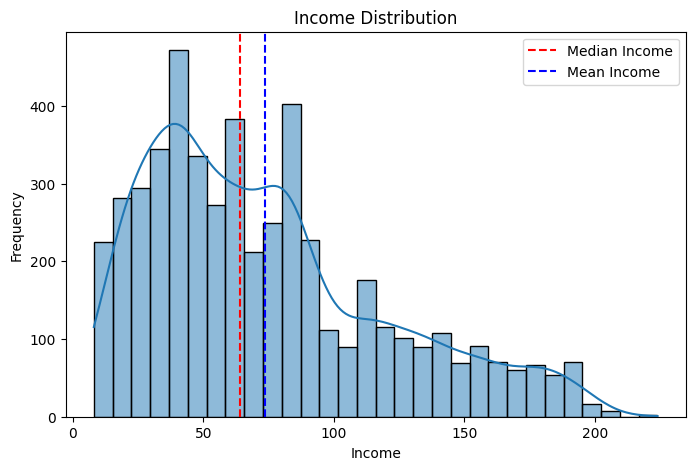

In [13]:
# Income distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Income'], kde=True, bins=30)
plt.title('Income Distribution')
plt.axvline(data['Income'].median(), color='red', linestyle='--', label='Median Income')
plt.axvline(data['Income'].mean(), color='blue', linestyle='--', label='Mean Income')
plt.legend()
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Observation:
- The income distribution is right-skewed, with a median income appearing near 60 and a mean income near 75.
- Customers with higher incomes might be more likely to accept personal loan offers; further segmentation or bivariate analysis with `Personal_Loan` can confirm this.


**The below functions are defined below to carry out the EDA.**

In [14]:
def combined_box_hist_plot(data, feature, figsize=(15, 10), kde=False, bins='auto'):
    """
    Boxplot and histogram combined

    Parameters:
    - data: DataFrame containing the data.
    - feature: Column name for the feature to plot.
    - figsize: Tuple for figure size (default is (15, 10)).
    - kde: Whether to show the density curve on the histogram (default is False).
    - bins: Number of bins or method for histogram (default is 'auto').
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,  # Share the x-axis
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Adjust grid proportions
        figsize=figsize,
    )

    # Create a boxplot
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,
        color="violet"
    )

    # Create a histogram
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=ax_hist,
        bins=bins  # Use 'auto' or user-provided value
    )

    # Add vertical lines for mean and median
    mean_val = data[feature].mean()
    median_val = data[feature].median()
    ax_hist.axvline(mean_val, color="green", linestyle="--", label=f"Mean: {mean_val:.2f}")
    ax_hist.axvline(median_val, color="black", linestyle="-", label=f"Median: {median_val:.2f}")
    ax_hist.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


In [15]:
def annotated_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage or count annotations.

    Parameters:
    - data: DataFrame containing the data.
    - feature: Column name for the feature to plot.
    - perc: Whether to display percentages instead of counts (default is False).
    - n: Number of top categories to display (default is None for all categories).
    """
    total = len(data[feature])
    unique_count = data[feature].nunique()

    plt.figure(figsize=(unique_count + 2 if n is None else n + 2, 6))
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc:
            label = f"{100 * p.get_height() / total:.1f}%"  # Show percentage
        else:
            label = f"{p.get_height()}"  # Show count

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="bottom",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )

    plt.xticks(rotation=90)
    plt.show()


In [16]:
def stacked_category_plot(data, predictor, target, normalize=True, figsize_multiplier=1.5, bar_width=0.8):
    """
    Generate a stacked bar chart for category counts with optional normalization.

    Parameters:
    - data: DataFrame containing the data.
    - predictor: Independent variable (categorical column).
    - target: Dependent variable (categorical column).
    - normalize: If True, normalize the counts by row. Default is True.
    - figsize_multiplier: Multiplier for dynamically adjusting figure width. Default is 1.5.
    - bar_width: Width of the bars in the plot. Default is 0.8.
    """
    # calculate the number of unique categories
    unique_count = data[predictor].nunique()

    # cross-tabulation of the predictor and target
    count_table = pd.crosstab(data[predictor], data[target])
    print("Category Counts Table:")
    print(count_table)
    print("-" * 80)

    # normalize the table by row if normalize=True
    if normalize:
        normalized_table = pd.crosstab(data[predictor], data[target], normalize="index")
    else:
        normalized_table = count_table

    # generates the stacked bar plot
    normalized_table.plot(
        kind="bar",
        stacked=True,
        figsize=(unique_count * figsize_multiplier, 5),
        width=bar_width,
        colormap="Paired",
    )

    # customizes the plot
    plt.title(f"Stacked Bar Plot of {predictor} vs {target}", fontsize=16)
    plt.xlabel(predictor, fontsize=14)
    plt.ylabel("Proportion" if normalize else "Count", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(
        loc="upper left",
        bbox_to_anchor=(1.05, 1),
        title=target,
        fontsize=10,
    )
    plt.tight_layout()
    plt.show()


In [17]:
# function to plot the distribution of a numerical variable
def target_distribution_analysis(data, predictor, target, figsize=(14, 12), color_palette="Set2"):
    """
    Plot histograms and boxplots for a predictor variable with respect to the target variable.

    Parameters:
    - data: DataFrame containing the data.
    - predictor: Independent variable to analyze (numerical column).
    - target: Dependent variable (categorical column).
    - figsize: Size of the figure (default is (14, 12)).
    - color_palette: Color palette for plots (default is "Set2").
    """
    # extracts unique values of the target variable
    target_values = data[target].unique()

    # creates a 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=figsize)
    colors = sns.color_palette(color_palette, len(target_values))

    # histogram for target=0
    axs[0, 0].set_title(f"Distribution of {predictor} for {target} = {target_values[0]}")
    sns.histplot(
        data=data[data[target] == target_values[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color=colors[0],
        stat="density",
    )
    axs[0, 0].set_xlabel(predictor, fontsize=12)
    axs[0, 0].set_ylabel("Density", fontsize=12)

    # histogram for target=1
    axs[0, 1].set_title(f"Distribution of {predictor} for {target} = {target_values[1]}")
    sns.histplot(
        data=data[data[target] == target_values[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color=colors[1],
        stat="density",
    )
    axs[0, 1].set_xlabel(predictor, fontsize=12)
    axs[0, 1].set_ylabel("Density", fontsize=12)

    # boxplot for the predictor variable
    axs[1, 0].set_title(f"Boxplot of {predictor} w.r.t {target}")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette=color_palette)
    axs[1, 0].set_xlabel(target, fontsize=12)
    axs[1, 0].set_ylabel(predictor, fontsize=12)

    # boxplot without outliers
    axs[1, 1].set_title(f"Boxplot of {predictor} w.r.t {target} (without outliers)")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        palette=color_palette,
        showfliers=False,
    )
    axs[1, 1].set_xlabel(target, fontsize=12)
    axs[1, 1].set_ylabel(predictor, fontsize=12)

    # adjust the layout
    plt.tight_layout()
    plt.show()

### Univariate Analysis

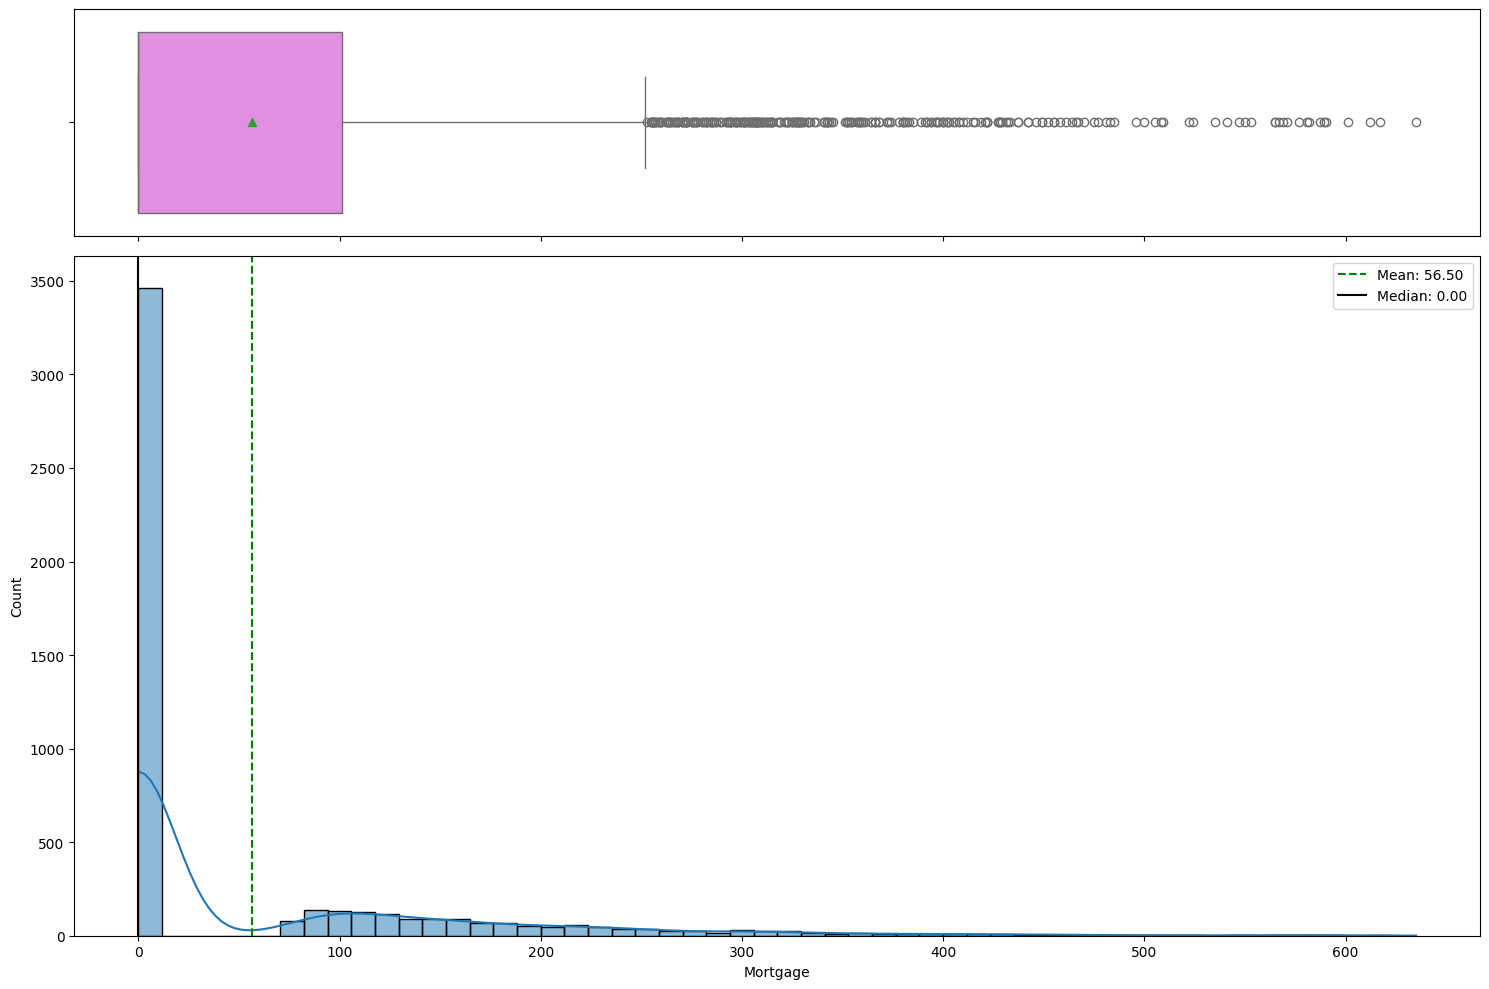

In [18]:

# Visualize the distribution of the 'Mortgage' attribute
combined_box_hist_plot(data, "Mortgage", kde=True)


* The majority of customers have a Mortgage value of 0, indicating many do not hold mortgages, with a sharp decline in frequency as mortgage values increase.
* The distribution is highly right-skewed, with a few extreme outliers exceeding 400, which may require further investigation or treatment during preprocessing.

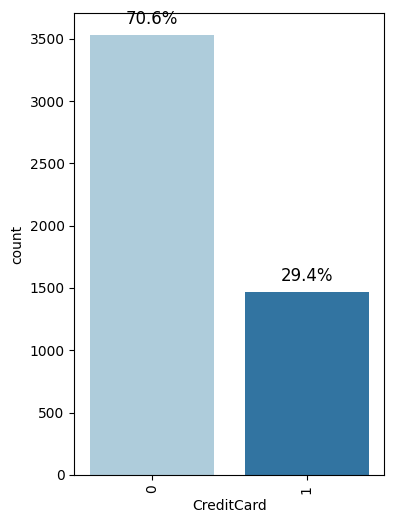

In [19]:
# How many customers have credit cards?

# Visualize the count of customers with and without credit cards
annotated_barplot(data, "CreditCard", perc=True)

* Approximately 70.6% of customers do not have a credit card, while only 29.4% do, suggesting the majority of the bank's customer base is not actively using credit cards.
* This imbalance indicates a potential market segment for the bank to target with credit card products, especially among liability customers.

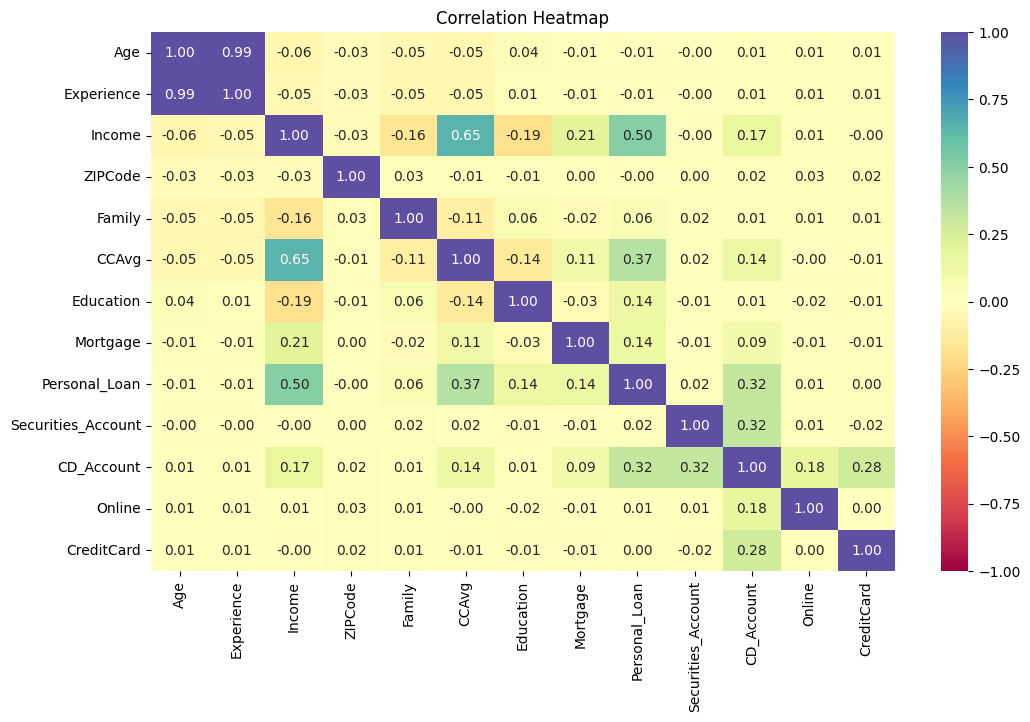

In [20]:
# 3. What are the attributes that have a strong correlation with the target attribute (Personal_Loan)? 

# Visualize the correlation between the attribute by using a heatmap to visualize the correlations 
# between the numeric attributes, focusing on the correlation of Personal_Loan with other features.

# Generate a heatmap for correlation analysis
cols_list = data.select_dtypes(include=np.number).columns.tolist()  # Select numeric columns
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral"
)
plt.title("Correlation Heatmap")
plt.show()

* Income and CCAvg (Credit Card Average Spending) show the highest positive correlations with Personal_Loan, with correlation coefficients of approximately 0.50 and 0.37 respectively, indicating these are significant predictors.
* CD_Account and Online usage also have moderate positive correlations (~0.32), suggesting these features might also influence the likelihood of accepting a personal loan.
* Other features, like ZIPCode and Age, have near-zero correlations, indicating little to no linear relationship with the target variable.

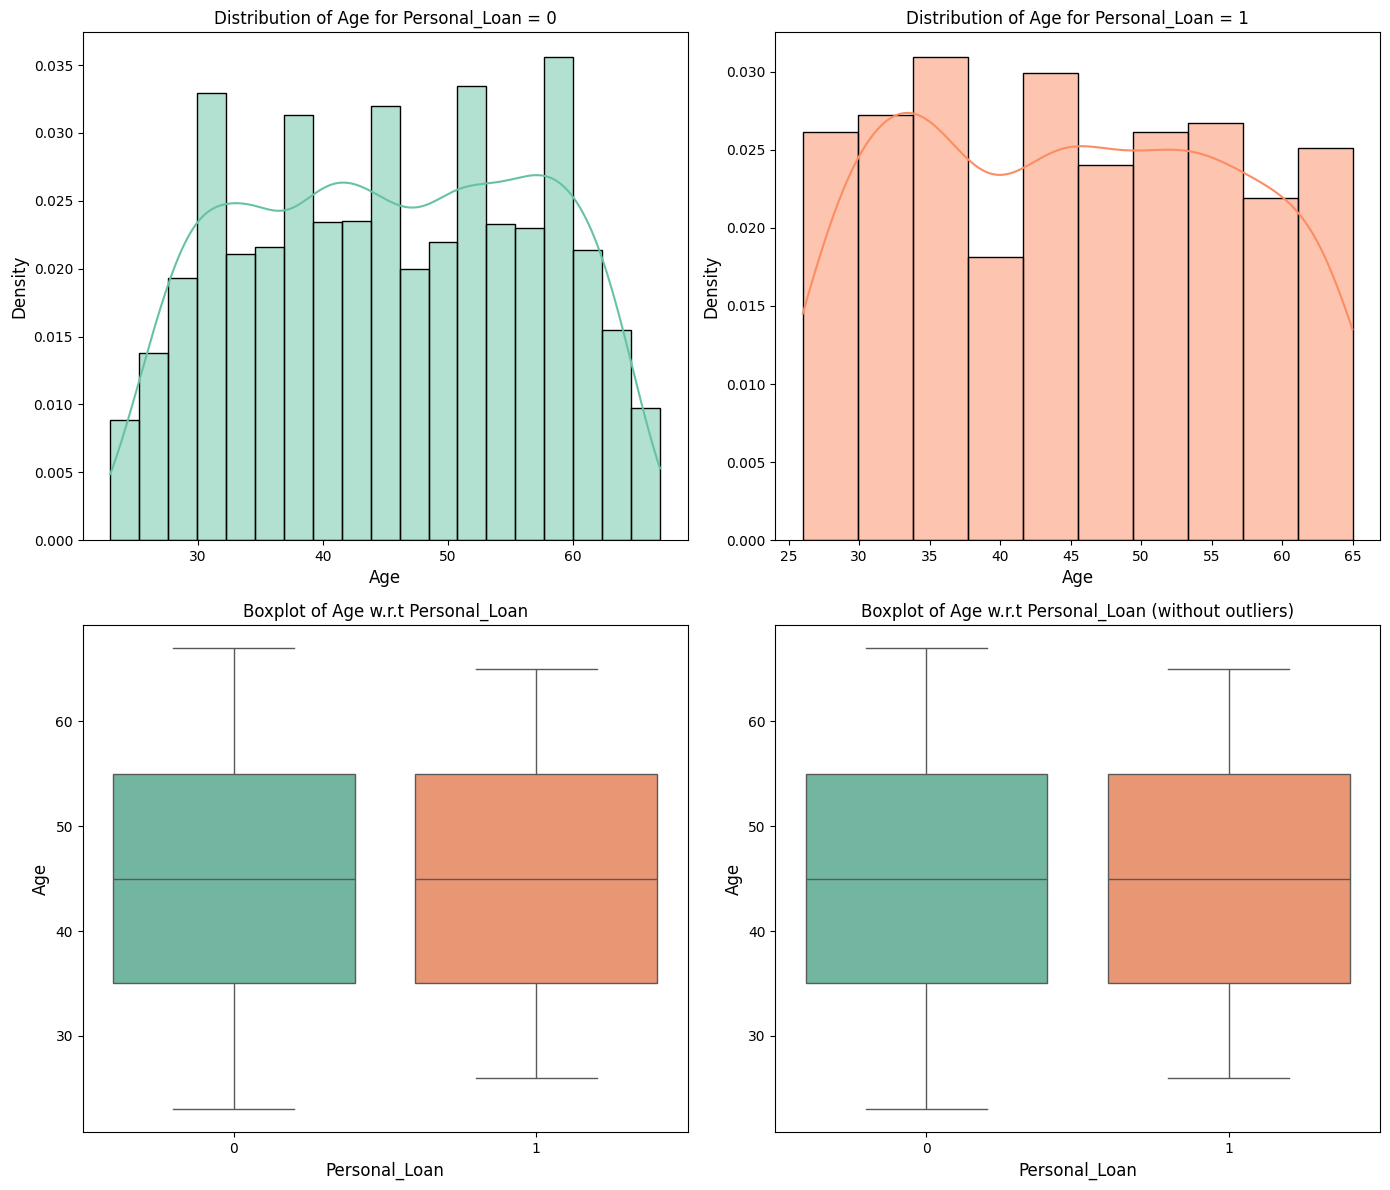

In [21]:
# 4. How does a customer's interest in purchasing a loan vary with their age?

# Visualize to Analyze the relationship distribution of the 'Age' attribute and Personal Loan
target_distribution_analysis(data, "Age", "Personal_Loan")


* The distribution of Age shows no significant difference between customers who accepted (Personal_Loan = 1) and those who did not (Personal_Loan = 0), indicating that age alone may not be a strong predictor of loan acceptance.

Category Counts Table:
Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
--------------------------------------------------------------------------------


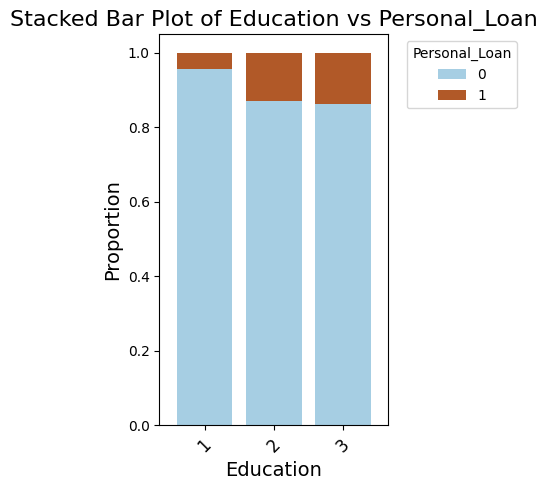

In [22]:
# 5. How does a customer's interest in purchasing a loan vary with their education?

# Analyze the relationship between Education and Personal Loan
stacked_category_plot(data, "Education", "Personal_Loan")

* Customers with higher education levels (Education = 3, Advanced/Professional) have a noticeably higher likelihood of accepting a personal loan compared to those with lower education levels (Education = 1, Undergraduate), making education a significant predictor of loan acceptance.

## Data Preprocessing

### Outlier Detection

**Let's check for outliers in the data.**

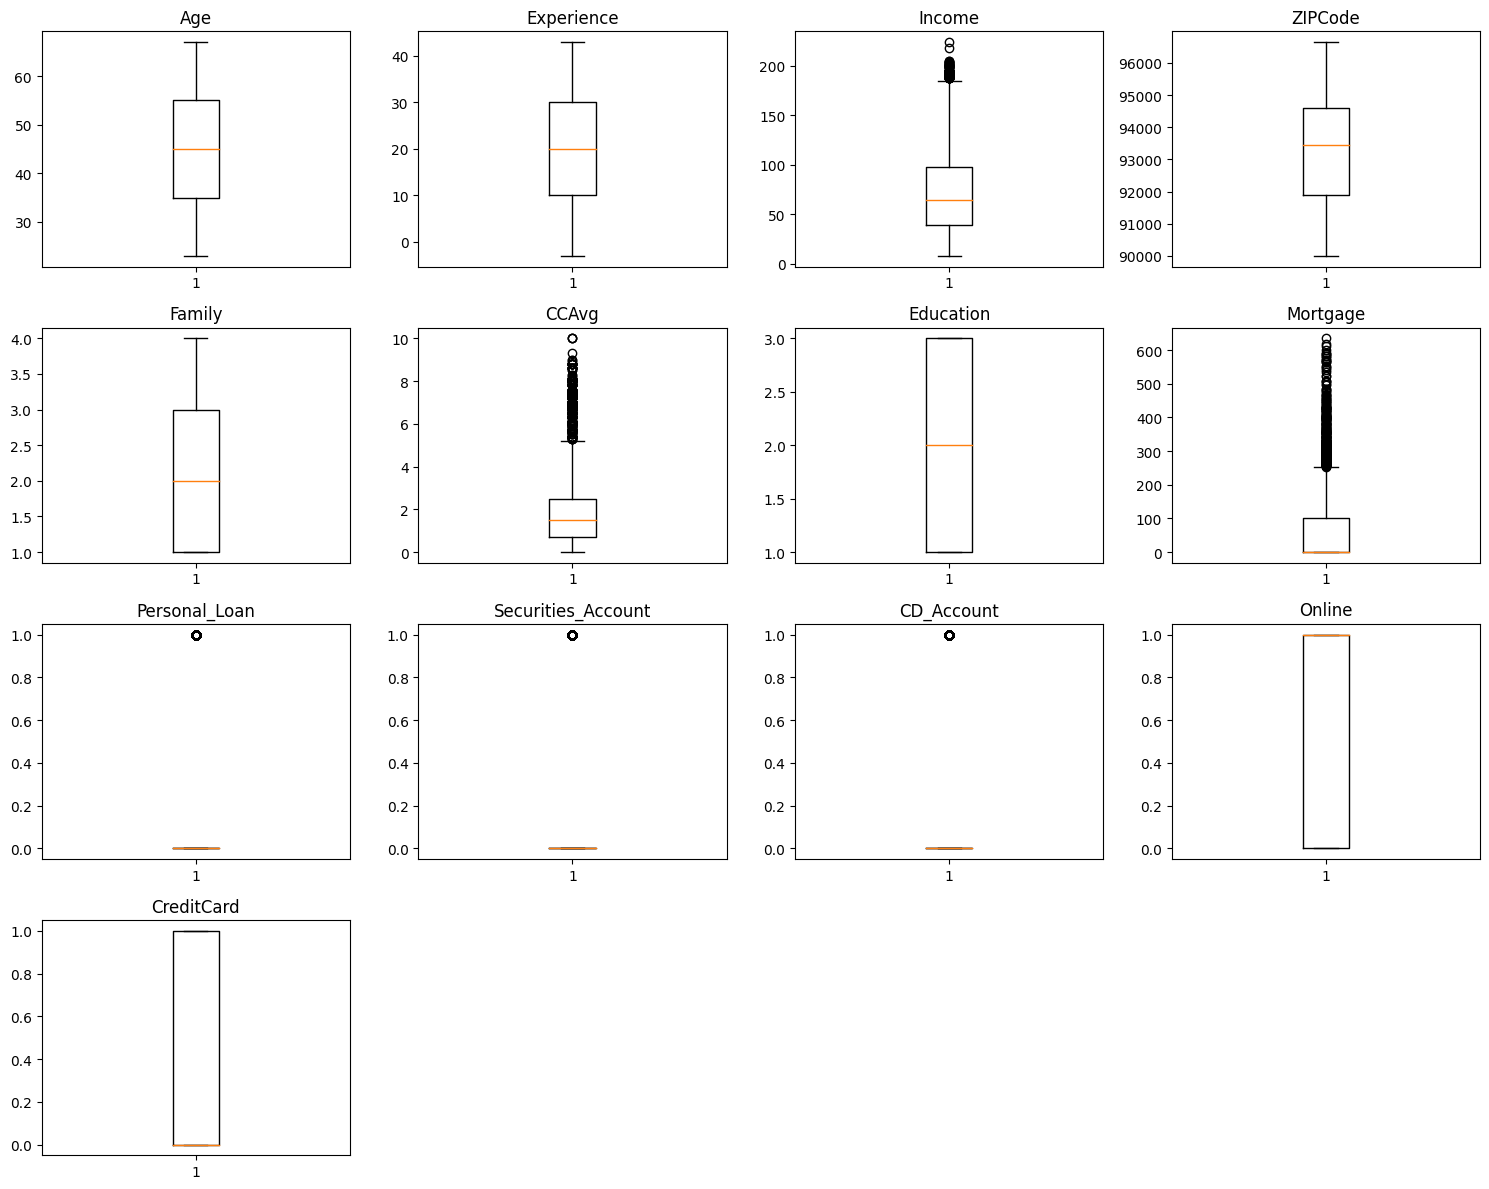

In [23]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* The Income, CCAvg, and Mortgage columns exhibit significant outliers, with values far exceeding the whisker limits, indicating a need for outlier treatment in these features.
* The categorical-like variables (Securities_Account, CD_Account, Online, CreditCard) and ZIPCode show no visible outliers, as they are either binary or have tightly distributed values.

In [24]:
# Another way to detect outliers is to use the IQR (Interquartile Range) method

# detects and caps the outliers in a DataFrame
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    # caps the lower outliers
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

# Apply outlier treatment to relevant numerical columns
numerical_columns = ['Income', 'Experience', 'CCAvg', 'Mortgage']  # List of numerical columns
for column in numerical_columns:
    cap_outliers(data, column)

# Check the summary statistics after outlier treatment
print(data[numerical_columns].describe())

Income: Lower Bound = -49.5, Upper Bound = 186.5
Experience: Lower Bound = -20.0, Upper Bound = 60.0
CCAvg: Lower Bound = -2.0, Upper Bound = 5.2
Mortgage: Lower Bound = -151.5, Upper Bound = 252.5
            Income   Experience        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000
mean     73.617400    20.104600     1.831338    50.494700
std      45.626122    11.467954     1.452215    83.005401
min       8.000000    -3.000000     0.000000     0.000000
25%      39.000000    10.000000     0.700000     0.000000
50%      64.000000    20.000000     1.500000     0.000000
75%      98.000000    30.000000     2.500000   101.000000
max     186.500000    43.000000     5.200000   252.500000


- Negative values for **Experience** were replaced with zero, aligning with logical constraints, while extreme positive values were capped at 43.
- **Income**, **CCAvg**, and **Mortgage** outliers were successfully capped at their respective upper bounds (186.5, 5.2, and 252.5), ensuring reasonable ranges without altering the distribution significantly.
- The adjusted data now exhibits more consistent variability across features, reducing noise and improving the reliability of model predictions.
- The outlier treatment aligns with business logic, ensuring all capped values remain realistic and interpretable.

### Data Preparation for Modeling

In [25]:
# Check and clean negative values in the Experience column
negative_experience_count = data[data['Experience'] < 0].shape[0]
print(f"Number of negative values in Experience: {negative_experience_count}")

# Replace negative values with the median of the positive values
median_experience = data[data['Experience'] >= 0]['Experience'].median()
data['Experience'] = data['Experience'].apply(lambda x: median_experience if x < 0 else x)

# Separate features and target variable
X = data.drop(["Personal_Loan"], axis=1)  # Drop the target column from features
Y = data["Personal_Loan"]  # Target column

# Convert categorical columns to dummy variables (if needed)
X = pd.get_dummies(X, drop_first=True)

# Ensure all features are in float format
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


Number of negative values in Experience: 52


In [26]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


* We observed that around 90.5% of observations belong to class 0 (Did not accept the loan) and 9.5% belong to class 1 (Accepted the loan), and this class imbalance is preserved in the training and test sets.

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a customer will not accept the loan but in reality, the customer would have accepted it (FN).
- Predicting a customer will accept the loan but in reality, the customer does not accept it (FP).

**Which case is more important?**

- If we predict that a customer will not accept the loan but in reality, the customer would have accepted it, the bank loses a potential revenue opportunity and may miss converting a liability customer into an asset customer (FN).
- If we predict that a customer will accept the loan but in reality, the customer does not accept it, the bank incurs the cost of marketing to an uninterested customer, which may include effort, time, and resources (FP).
- The cost of missing a potential customer (FN) is generally higher than the cost of marketing to uninterested customers (FP).

**How to reduce the losses?**

The bank would want the recall to be maximized. A higher recall score ensures the model minimizes False Negatives, increasing the chances of capturing customers who are likely to accept the loan.

In [27]:
# calculate_model_performance - defining a function to calculate different metrics to check classification model performance 
def calculate_model_performance(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predict the target values
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # computes Accuracy
    recall = recall_score(target, pred)  # computes Recall
    precision = precision_score(target, pred)  # computes Precision
    f1 = f1_score(target, pred)  # computes F1 score

    # dataframe to store the metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [28]:
def display_confusion_matrix(model, predictors, target):
    """
    plots the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

In [29]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

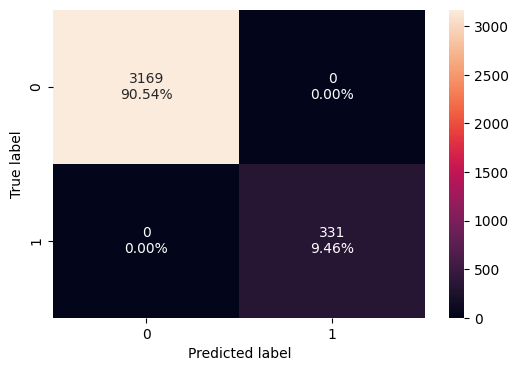

In [30]:
display_confusion_matrix(model0, X_train, y_train)

In [31]:
decision_tree_default_perf_train = calculate_model_performance(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


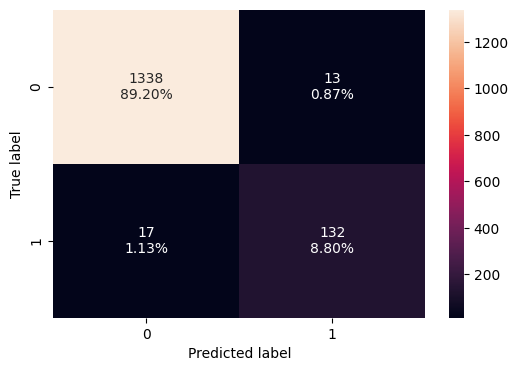

In [32]:
display_confusion_matrix(model0, X_test, y_test)

In [33]:
decision_tree_default_perf_test = calculate_model_performance(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


### Decision Tree (with class_weights)

* In our dataset, around 90.5% of customers belong to class 0 (Did not accept the loan), and only 9.5% belong to class 1 (Accepted the loan). This class imbalance can cause the decision tree to become biased toward the majority class (0), reducing its ability to accurately predict customers who might accept the loan.

* To address this, we will set class_weight="balanced", which automatically adjusts the weights to be inversely proportional to the class frequencies in the training data.

* class_weight is a hyperparameter for the decision tree classifier that helps the model handle imbalanced datasets by giving more importance to the minority class (1).

In [34]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

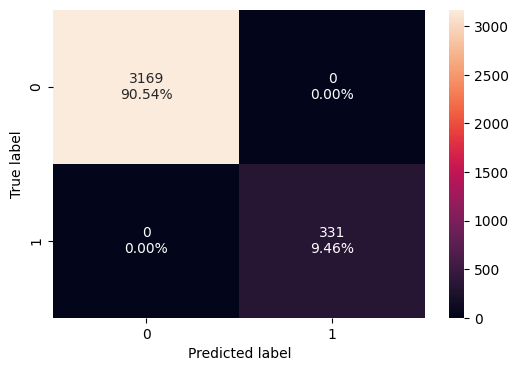

In [35]:
display_confusion_matrix(model1, X_train, y_train)

In [36]:
decision_tree_perf_train = calculate_model_performance(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* The decision tree achieves perfect scores on the training set (Accuracy, Recall, Precision, and F1 are all 1.0), indicating that it fits the training data well. However, this is often a sign of overfitting.
* By setting class_weight="balanced", the model accounts for the significant imbalance between Personal_Loan = 0 and Personal_Loan = 1, ensuring minority class predictions are weighted more heavily, reducing the bias toward the majority class.
* Although the training metrics are perfect, this likely indicates that the model has memorized the training data rather than generalizing well, which can be confirmed by evaluating the performance on the test set.
* To address the overfitting issue, we can consider applying pre-pruning techniques like limiting the maximum depth or minimum samples per leaf, or post-pruning to simplify the tree and enhance generalization.

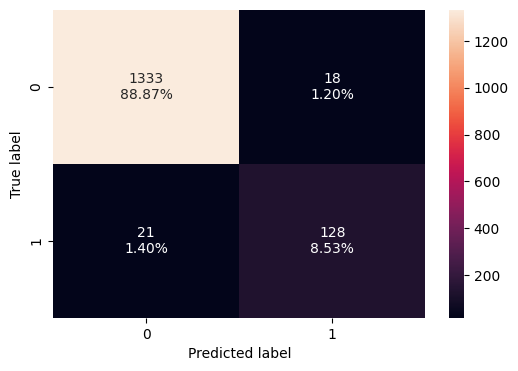

In [37]:
display_confusion_matrix(model1, X_test, y_test)

In [38]:
decision_tree_perf_test = calculate_model_performance(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.974,0.85906,0.876712,0.867797


* The test set performance shows a significant drop compared to the training set, with an accuracy of 97.47% and a recall of 85.91%, indicating that while the model handles class imbalance better with `class_weight="balanced"`, it still exhibits signs of overfitting and struggles to generalize perfectly to unseen data.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [39]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [40]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

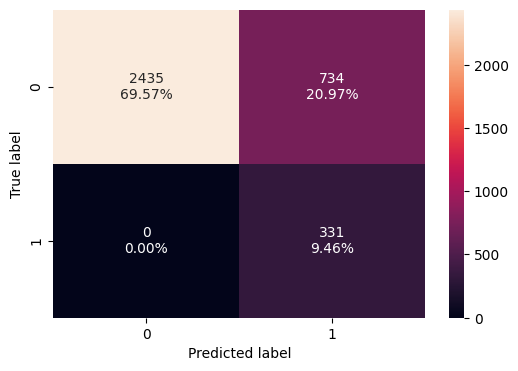

In [41]:
display_confusion_matrix(model2, X_train, y_train)

In [42]:
decision_tree_tune_perf_train = calculate_model_performance(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


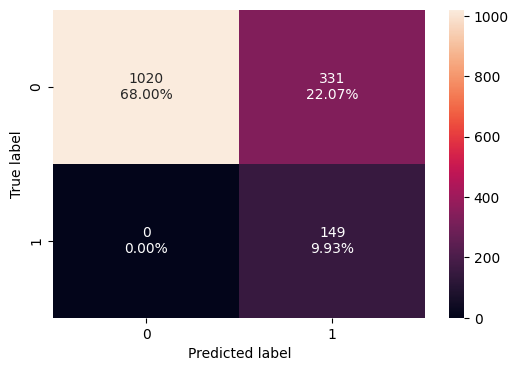

In [43]:
display_confusion_matrix(model2, X_test, y_test)

In [44]:
decision_tree_tune_perf_test = calculate_model_performance(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768



* The tuned decision tree model achieves perfect recall (1.0) on both the training and test sets, ensuring that all potential loan-accepting customers are identified, but it suffers from low precision (~0.31), indicating a high rate of false positives. This trade-off is acceptable for scenarios where recall is prioritized over precision to minimize missed opportunities.

In [45]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

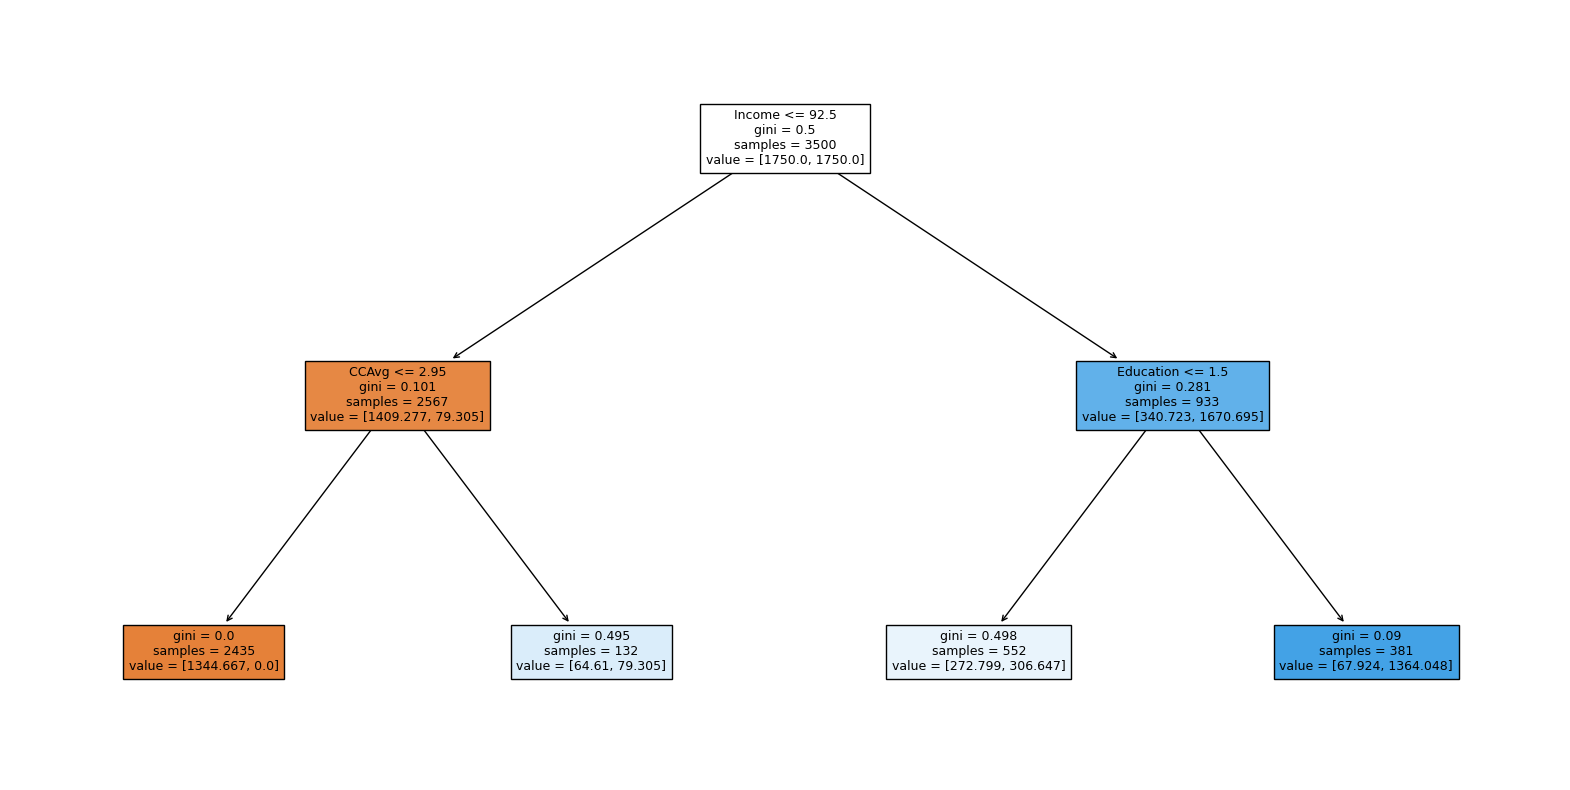

In [46]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# will add arrows
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [47]:
# display the decision tree text
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



Using the above extracted decision rules from the decision tree model, we can make interpretations for predicting whether a customer is likely to accept a personal loan:

* If the Income is less than or equal to 92.50 and the CCAvg (average monthly credit card spending) is less than or equal to 2.95, the customer is most likely not interested in a personal loan (Class 0).

* If the Income is less than or equal to 92.50 but the CCAvg is greater than 2.95, the customer is likely to accept a personal loan (Class 1).

* If the Income is greater than 92.50 and the Education level is less than or equal to 1.50 (Undergrad), the customer is likely to accept a personal loan (Class 1).

* If the Income is greater than 92.50 and the Education level is greater than 1.50 (Graduate or Advanced), the customer is most likely to accept a personal loan (Class 1) with high confidence.

Note: Interpretations from other decision rules can be made similarly, which can help the marketing team tailor campaigns to specific customer segments, such as those with high income and education levels or those with moderate credit card spending habits.

In [48]:
importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.82007181, 0.        , 0.        ,
       0.06262835, 0.11729984, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

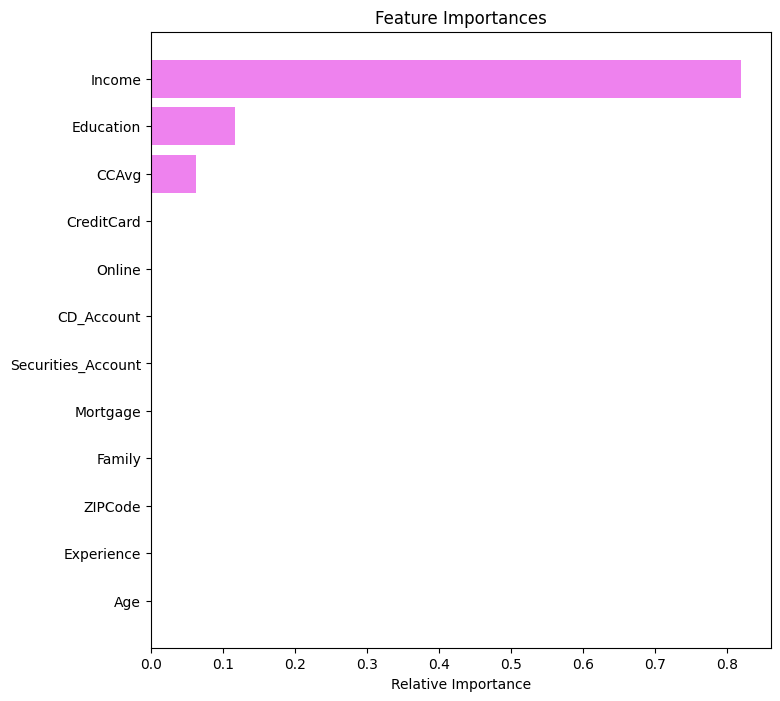

In [49]:
# shows importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-pruned decision tree, Income, Education, and CCAvg (credit card average spending) are the most important features influencing whether a customer accepts a personal loan.

### Decision Tree (Post pruning)

- Cost complexity pruning provides another option to control the size of a tree.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [50]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [51]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-8.609055e-15
1,4.729571e-19,-8.608582e-15
2,4.729571e-19,-8.608109e-15
3,4.729571e-19,-8.607636e-15
4,5.255079e-19,-8.607110e-15
5,7.882619e-19,-8.606322e-15
6,1.051016e-18,-8.605271e-15
7,8.338059e-18,-8.596933e-15
8,1.257806e-17,-8.584355e-15
9,1.545500e-04,3.090999e-04


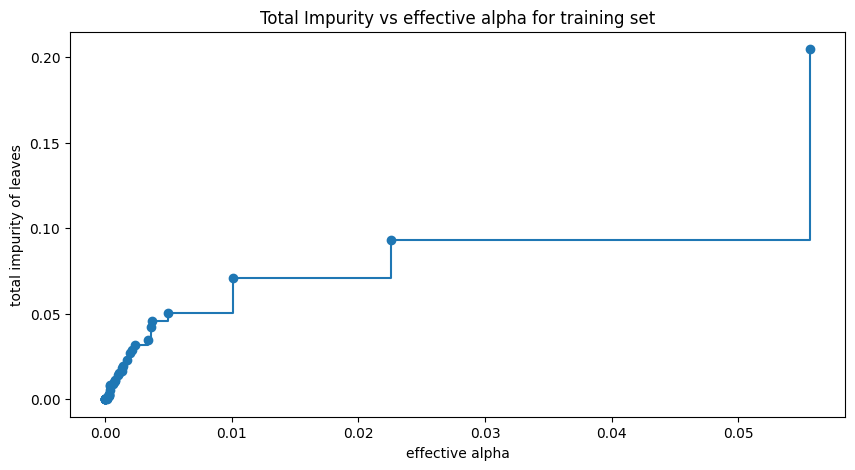

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [53]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992318


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

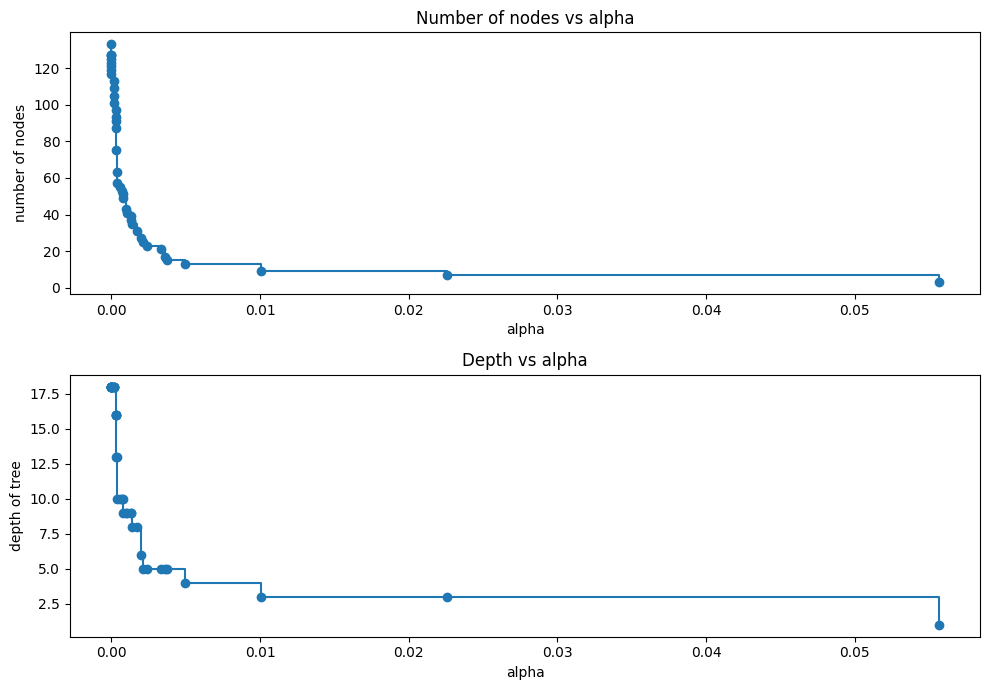

In [54]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [55]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [56]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [57]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

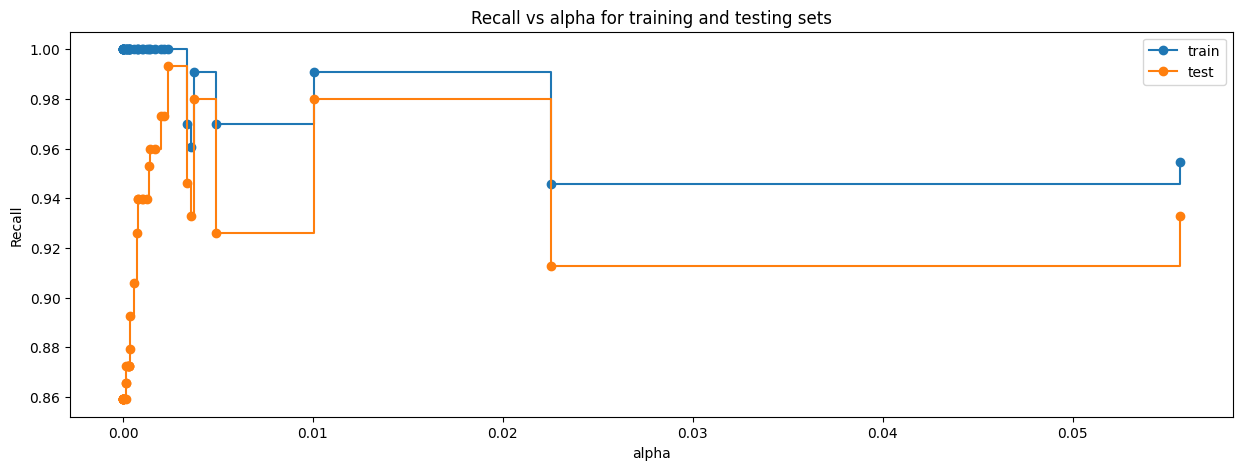

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [59]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002375808619774645, class_weight='balanced',
                       random_state=1)


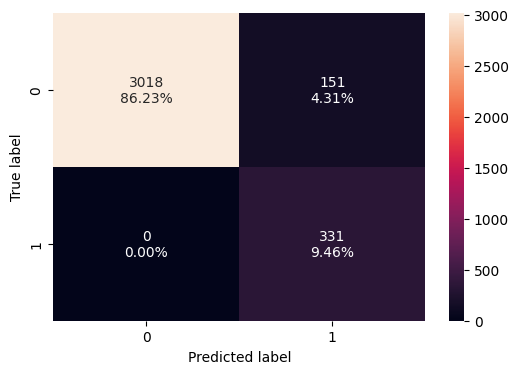

In [60]:
model4 = best_model
display_confusion_matrix(model4, X_train, y_train)

In [61]:
decision_tree_post_perf_train = calculate_model_performance(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


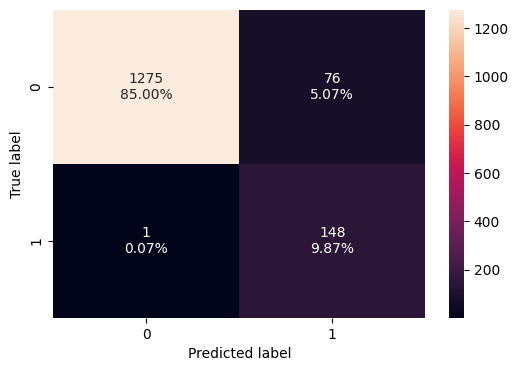

In [62]:
display_confusion_matrix(model4, X_test, y_test)

In [63]:
decision_tree_post_test = calculate_model_performance(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


* In the post-pruned tree, the model demonstrates a strong ability to generalize, as indicated by high recall scores on both the training data (1.0) and testing data (0.993). This result suggests that the model effectively maintains its predictive performance even on unseen data while balancing complexity.

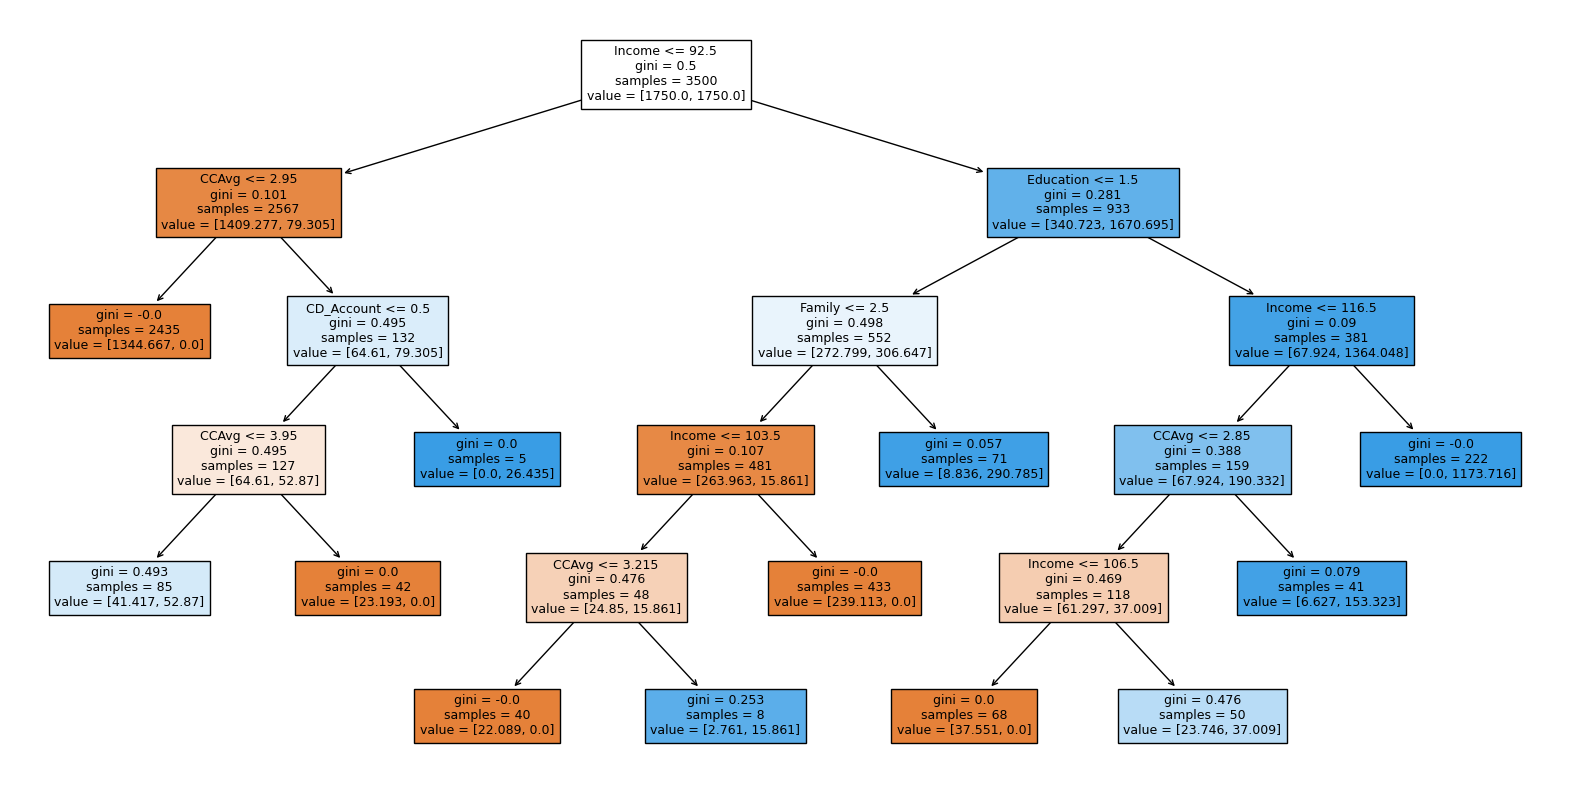

In [64]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [65]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

- We can observe that the insights derived from the pre-pruned tree align closely with the decision rules of the post-pruned tree, indicating consistent patterns in the influence of features like Income, CCAvg, and Education on the classification of personal loan acceptance.

In [66]:
importances = model4.feature_importances_
indices = np.argsort(importances)

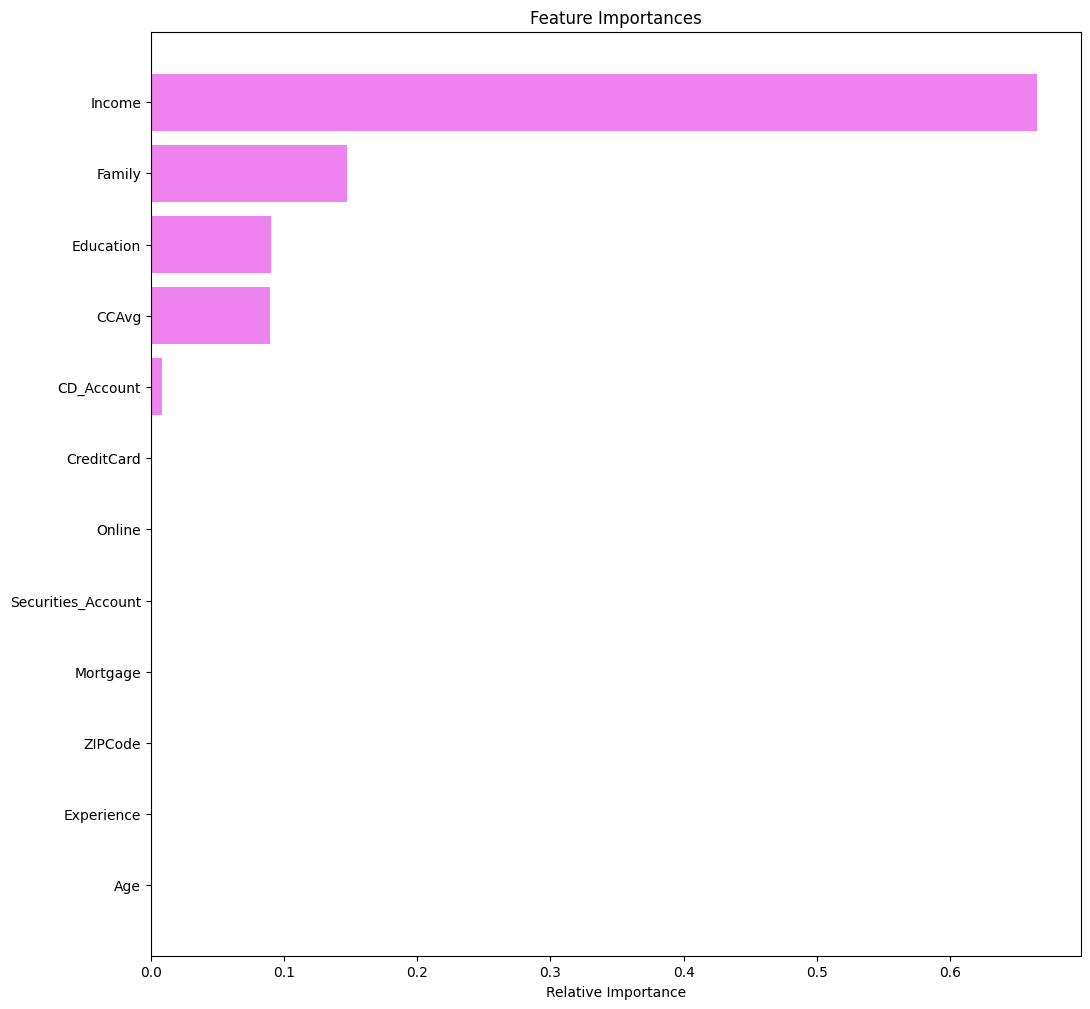

In [67]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Income and Family are the most important features for the post-pruned tree, followed by Education and CCAvg, which also play significant roles in the model's decision-making process.

## Comparison of Models and Final Model Selection

In [68]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [69]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.974000,0.779333,0.948667
Recall,0.885906,0.859060,1.000000,0.993289
Precision,0.910345,0.876712,0.310417,0.660714
F1,0.897959,0.867797,0.473768,0.793566


* Decision tree models with post-pruning show a good balance between recall and precision, achieving a high recall of 1.0 on the training set and 0.993 on the test set. 
* While the pre-pruned model achieves perfect recall, its low precision and F1-score indicate a risk of excessive false positives, leading to increased costs and inefficiencies. 
* Post-pruning strikes a balance, improving precision and F1-scores significantly while maintaining near-perfect recall. For this reason, the post-pruned model is selected as the best, as it generalizes effectively and aligns with business objectives by targeting potential loan acceptors accurately without overwhelming the system with false positives.

## Conclusions and Recommendations

- The model built can be used to predict whether a customer will take a personal loan or not, and it can correctly identify 99.3% of the positive cases on the test set.
- Income, Family size, and Education level are the most important variables in predicting whether a customer will take a personal loan.


- From the decision tree, it has been observed that customers with an income less than or equal to $92.5K and credit card average spending (CCAvg) less than or equal to 2.95 are unlikely to take a personal loan. Conversely, customers with higher income and more significant family sizes tend to show a higher likelihood of taking a personal loan.

- The business should monitor these segments to target potential personal loan customers effectively.
The business should explore collecting more granular data, such as spending patterns or other financial behaviors, to refine and improve the prediction model further.

- As personal loan behavior may vary based on regional or demographic differences, the business could build separate models tailored to specific customer segments or geographical areas.

- Additionally, the business could use the insights from the model to design personalized marketing campaigns or offers that align with the identified key features, such as income level or family size.

___